# Natural Language Processing with Python
## Chapter 4 Wring Structured Programs
### 4.1 Back to the Basics
#### Assignment
#### Equality
#### Conditionals
### 4.2 Sequences
#### Operating on Sequence Types
#### Combining Different Sequence Types
#### Generator Expressions
### 4.3 Questions of Style
#### Python Coding Style
#### Procedural vs Declarative Style
#### Some Legitimate Uses for Counters
### 4.4 Functions: The Foundation of Structured Programming
#### Function Inputs and Outputs
#### Parameter Passing
#### Variable Scope
#### Checking Parameter Types
#### Functional Decomposition
#### Documenting Functions
### 4.5 Doing More with Functions
#### Accumulative Functions
#### Higher-Order Functions
#### Named Arguments
### 4.6 Program Development
#### Structure of a Python Module
#### Multi-Module Programs
#### Sources of Error
#### Debugging Techniques
#### Defensive Programming
### 4.7 Algorithm Design
#### Recursion

In [5]:
import pprint
def insert(trie,key,value):
    if key:
        start,rest = key[0],key[1:]
        if start not in trie:
            trie[start] = {}
        insert(trie[start],rest,value)
    else:
        trie['value'] = value
trie = {}
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')
pprint.pprint(trie,width=40)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}},
                   't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'},
                   'e': {'n': {'value': 'dog'}}}}}}


#### Space-Time Tradeoffs

In [10]:
from timeit import Timer
VocabSize = 100000
StartList = 'import random; vocab = list(range(%d))' % VocabSize
StartSet = 'import random; vocab = set(range(%d))' % VocabSize
statement = 'random.randint(0,%d) in vocab' % (VocabSize*2)
print(Timer(statement,StartList).timeit(1000))
print(Timer(statement,StartSet).timeit(1000))

1.5568755000001602
0.001674799999818788


#### Dynamic Programming
s takes one unit length, l takes two. construct a meter of length 4: V4 = {LL, SSL, SLS, LSS, SSSS}
```
V4 =
  LL, LSS
    i.e. L prefixed to each item of V2 = {L, SS}
  SSL, SLS, SSSS
    i.e. S prefixed to each item of V3 = {SL, LS, SSS}
```

In [1]:
def virahankal(n):
    if n == 0 :
        return ['']
    if n == 1 :
        return ['S']
    else:
        s = ['S'+i for i in virahankal(n-1)]
        l = ['L'+i for i in virahankal(n-2)]
        return s + l
virahankal(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [2]:
def virahankal2(n):
    lookup = [[''],['S']]
    for i in range(n-1):
        s = ['S' + i for i in lookup[i+1]]
        l = ['L' + i for i in lookup[i]]
        lookup.append(s+l)
    return lookup[-1]
virahankal2(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [3]:
def virahankal3(n,lookup={0:[''],1:['S']}):
    if n not in lookup:
        s = ['S' + i for i in virahankal3(n-1)]
        l = ['L' + i for i in virahankal3(n-2)]
        lookup[n] = s + l
    return lookup[n]
virahankal3(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [4]:
from nltk import memoize
@memoize
def virahankal4(n):
    if n == 0 :
        return ['']
    if n == 1 :
        return ['S']
    else:
        s = ['S'+i for i in virahankal(n-1)]
        l = ['L'+i for i in virahankal(n-2)]
        return s + l
virahankal4(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

### 4.8 A Sample of Python Libraries
#### Matplotlib

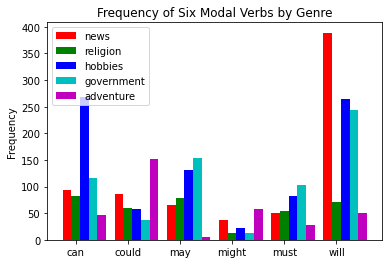

In [12]:
from numpy import arange
from matplotlib import pyplot
import nltk
colors = 'rgbcmyk'
def BarChart(categories,words,counts):
    ind = arange(len(words))
    width = 1/(len(categories)+1)
    BarList = []
    for i in range(len(categories)):
        bars = pyplot.bar(ind+i*width,counts[categories[i]],width,color=colors[i])
        BarList.append(bars)
    pyplot.xticks(ind+width,words)
    pyplot.legend([b[0] for b in BarList],categories,loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()
categories = ['news', 'religion', 'hobbies', 'government', 'adventure']
words = ['can', 'could', 'may', 'might', 'must', 'will']
WordCFD = nltk.ConditionalFreqDist(
    (cate,w)
    for cate in categories
    for w in nltk.corpus.brown.words(categories=cate) if w in words
)
counts = {}
for cate in categories:
    counts[cate] = [WordCFD[cate][w] for w in words]
BarChart(categories,words,counts)

#### NetworkX

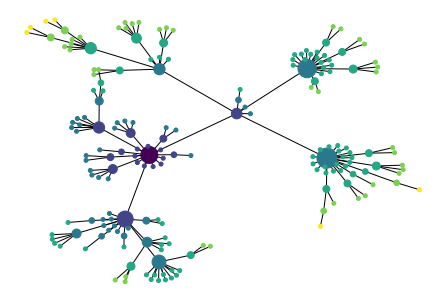

In [23]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn
from networkx import *
def traverse(graph,start,node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name,child.name)
        traverse(graph,start,child)
def HyponymGraph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G,start,start)
    return G
def DrawGraph(graph):
    nx.draw(graph,
        node_size = [16 * graph.degree(n) for n in graph],
        node_color = [graph.depth[n] for n in graph],
        with_labels = False)
    matplotlib.pyplot.show
dog = wn.synset('dog.n.01')
grpah = HyponymGraph(dog)
DrawGraph(grpah)

#### csv
#### NumPy
#### Other Python Libraries
### 4.9 Summary
### 4.10 Further Reading
### 4.11 Exercises

#### 1. Find out more about sequence objects using Python's help facility. In the interpreter, type `help(str)`, `help(list)`, and `help(tuple)`. This will give you a full list of the functions supported by each type. Some functions have special names flanked with underscore; as the help documentation shows, each such function corresponds to something more familiar. For example `x.__getitem__(y)` is just a long-winded way of saying `x[y]`.
#### 2. Identify three operations that can be performed on both tuples and lists. Identify three list operations that cannot be performed on tuples. Name a context where using a list instead of a tuple generates a Python error.
#### 3. Find out how to create a tuple consisting of a single item. There are at least two ways to do this.
#### 4. Create a list `words = ['is', 'NLP', 'fun', '?']`. Use a series of assignment statements (e.g. `words[1] = words[2]`) and a temporary variable `tmp` to transform this list into the list `['NLP', 'is', 'fun', '!']`. Now do the same transformation using tuple assignment.

In [24]:
words = ['is', 'NLP', 'fun', '?']
tmp = words[0]
words[0] = words[1]
words[1] = tmp
words[3] = '!'
words

['NLP', 'is', 'fun', '!']

#### 5. Read about the built-in comparison function cmp, by typing help(cmp). How does it differ in behavior from the comparison operators?
#### 6. Does the method for creating a sliding window of n-grams behave correctly for the two limiting cases: `n = 1`, and `n = len(sent)`?
#### 7. We pointed out that when empty strings and empty lists occur in the condition part of an `if` clause, they evaluate to `False`. In this case, they are said to be occurring in a Boolean context. Experiment with different kind of non-Boolean expressions in Boolean contexts, and see whether they evaluate as True or False.
#### 8. Use the inequality operators to compare strings, e.g. `'Monty' < 'Python'`. What happens when you do `'Z' < 'a'`? Try pairs of strings which have a common prefix, e.g. `'Monty' < 'Montague'`. Read up on "lexicographical sort" in order to understand what is going on here. Try comparing structured objects, e.g. `('Monty', 1) < ('Monty', 2)`. Does this behave as expected?
#### 9. Write code that removes whitespace at the beginning and end of a string, and normalizes whitespace between words to be a single space character.
##### a. do this task using `split()` and `join()`
##### b. do this task using regular expression substitutions

In [26]:
s = '  asd df   ds  dsaf   '
' '.join(s.split())

'asd df ds dsaf'

In [33]:
import re
s = re.sub(r'^ +| +$',r'',s)
re.sub(r' +',r' ',s)

'asd df ds dsaf'

#### 10. Write a program to sort words by length. Define a helper function `cmp_len` which uses the `cmp` comparison function on word lengths.

In [36]:
a = ['a','aa','aaaa','aaa']
sorted(a,key= lambda x:len(x))

['a', 'aa', 'aaa', 'aaaa']

#### 11. Create a list of words and store it in a variable `sent1`. Now assign `sent2 = sent1`. Modify one of the items in `sent1` and verify that `sent2` has changed.
##### a. Now try the same exercise but instead assign `sent2 = sent1[:]`. Modify `sent1` again and see what happens to `sent2`. Explain.
##### b. Now define `text1` to be a list of lists of strings (e.g. to represent a text consisting of multiple sentences. Now assign `text2 = text1[:]`, assign a new value to one of the words, e.g. `text1[1][1] = 'Monty'`. Check what this did to `text2`. Explain.
##### c. Load Python's `deepcopy()` function (i.e. `from copy import deepcopy`), consult its documentation, and test that it makes a fresh copy of any object.

In [39]:
sent1 = ['a','b','c','d']
sent2 = sent1
sent1[1] = 'e'
print(sent2)
sent2 = sent1[:]
sent1[1] = 'f'
print(sent2)
text = [['a,','b'],['c','d']]
text2 = text[:]
text[1][1] = 'Monty'
text2

['a', 'e', 'c', 'd']
['a', 'e', 'c', 'd']


[['a,', 'b'], ['c', 'Monty']]

#### 12. Initialize an n-by-m list of lists of empty strings using list multiplication, e.g. `word_table = [[''] * n] * m`. What happens when you set one of its values, e.g. `word_table[1][2] = "hello"`? Explain why this happens. Now write an expression using `range()` to construct a list of lists, and show that it does not have this problem.

In [5]:
l = [['']*3]*4
l[1][2] = 'hello'
l

[['', '', 'hello'], ['', '', 'hello'], ['', '', 'hello'], ['', '', 'hello']]

#### 13. Write code to initialize a two-dimensional array of sets called `word_vowels` and process a list of words, adding each word to `word_vowels[l][v]` where `l` is the length of the word and `v` is the number of vowels it contains.

In [19]:
import re
import nltk
WordVowels = []
for i in range(1,50):
    l = []
    for i in range(1,i+2):
        l.append([])
    WordVowels.append(l)
WordList = nltk.corpus.brown.words('ca01')
for i in WordList:
    WordVowels[len(i)][len(re.findall(r'[aeiou]',i.lower()))].append(i.lower())
WordVowels[8][2]

['term-end',
 'handling',
 'servants',
 'property',
 'dissents',
 'platform',
 'caldwell',
 'caldwell',
 'chambers',
 'friendly',
 'highways',
 'formally',
 'congress',
 'midnight']

#### 13. Write a function `novel10(text)` that prints any word that appeared in the last 10% of a text that had not been encountered earlier.

In [23]:
def novel10(text):
    Vocab90 = set(text[:int(0.9*len(text))])
    Text10 = text[-int(0.1*len(text)):]
    return [i for i in Text10 if not i in Vocab90]
print(novel10([i.lower() for i in WordList]))

['armed', 'pistol', 'stood', 'polls', 'insure', 'order', 'calmest', 'tom', 'polls', 'just', 'church', "didn't", 'smell', 'drop', 'liquor', "didn't", 'bit', 'trouble', 'leading', 'quiet', 'marked', 'anonymous', 'midnight', 'phone', 'calls', 'veiled', 'threats', 'violence', 'former', 'george', 'p.', 'callan', 'shot', 'himself', 'death', 'march', '18', 'days', 'post', 'dispute', 'during', 'reportedly', 'anonymous', 'telephone', 'calls', 'too', 'subjected', 'anonymous', 'calls', 'soon', 'scheduled', 'local', 'feared', 'polls', 'himself', 'carry', 'gun', 'promised', 'sheriff', 'tabb', 'good', 'promise', 'everything', 'went', 'real', 'smooth', 'sheriff', "wasn't", 'bit', 'trouble']


#### 15. Write a program that takes a sentence expressed as a single string, splits it and counts up the words. Get it to print out each word and the word's frequency, one per line, in alphabetical order.

In [27]:
sent =[i.lower() for i in nltk.corpus.brown.sents()[0]] 
WordFreq = {i:sent.count(i) for i in sent}
print(sorted([(i,WordFreq[i]) for i in WordFreq.keys()],key= lambda x:x[0]))

[("''", 1), ('.', 1), ('``', 1), ('an', 1), ('any', 1), ("atlanta's", 1), ('county', 1), ('election', 1), ('evidence', 1), ('friday', 1), ('fulton', 1), ('grand', 1), ('investigation', 1), ('irregularities', 1), ('jury', 1), ('no', 1), ('of', 1), ('place', 1), ('primary', 1), ('produced', 1), ('recent', 1), ('said', 1), ('that', 1), ('the', 1), ('took', 1)]


#### 16. Read up on Gematria, a method for assigning numbers to words, and for mapping between words having the same number to discover the hidden meaning of texts (`http://en.wikipedia.org/wiki/Gematria`, `http://essenes.net/gemcal.htm`).
##### a. Write a function `gematria()` that sums the numerical values of the letters of a word, according to the letter values in `letter_vals`:
``` 	
letter_vals = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':80, 'g':3, 'h':8,'i':10, 'j':10, 'k':20, 'l':30, 'm':40, 'n':50, 'o':70, 'p':80, 'q':100,'r':200, 's':300, 't':400, 'u':6, 'v':6, 'w':800, 'x':60, 'y':10, 'z':7}
```
##### b. Process a corpus (e.g. `nltk.corpus.state_union`) and for each document, count how many of its words have the number 666.
##### c. Write a function `decode()` to process a text, randomly replacing words with their Gematria equivalents, in order to discover the "hidden meaning" of the text.

In [39]:
LetterValue = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':80, 'g':3, 'h':8,'i':10, 'j':10, 'k':20, 'l':30, 'm':40, 'n':50, 'o':70, 'p':80, 'q':100,'r':200, 's':300, 't':400, 'u':6, 'v':6, 'w':800, 'x':60, 'y':10, 'z':7}
def gematria(word):
    return sum(LetterValue[i.lower()] for i in word)
[i for i in [j for j in WordList if j.isalpha()] if gematria(i) == 666]

[]

#### 17. Write a function `shorten(text, n)` to process a text, omitting the n most frequently occurring words of the text. How readable is it?

In [55]:
def shorten(text,n):
    MostFreq = [i[0] for i in nltk.FreqDist(text).most_common(n)]
    return [i for i in text if not (i in MostFreq)]
' '.join(shorten([i.lower() for i in WordList],80)[:70])

"investigation atlanta's recent produced evidence any irregularities took further term-end presentments executive committee had over-all charge deserves praise thanks manner conducted september-october term had charged superior judge durwood pye investigate reports possible irregularities hard-fought won mayor-nominate ivan allen jr. only relative handful such reports considering widespread interest number size did find many registration laws outmoded inadequate often ambiguous act laws studied revised end modernizing improving them commented number other topics"

#### 18. Write code to print out an index for a lexicon, allowing someone to look up words according to their meanings (or pronunciations; whatever properties are contained in lexical entries).
#### 19. Write a list comprehension that sorts a list of WordNet synsets for proximity to a given synset. For example, given the synsets `minke_whale.n.01`, `orca.n.01`, `novel.n.01`, and `tortoise.n.01`, sort them according to their `shortest_path_distance()` from `right_whale.n.01`.

In [73]:
from nltk.corpus import wordnet as wn
s = ['minke_whale.n.01', 'orca.n.01', 'novel.n.01', 'tortoise.n.01']
s = [wn.synset(i) for i in s]
r = wn.synset('right_whale.n.01')
sorted(s,key= lambda x:x.shortest_path_distance(r))

[Synset('lesser_rorqual.n.01'),
 Synset('killer_whale.n.01'),
 Synset('tortoise.n.01'),
 Synset('novel.n.01')]

#### 20. Write a function that takes a list of words (containing duplicates) and returns a list of words (with no duplicates) sorted by decreasing frequency. E.g. if the input list contained 10 instances of the word `table` and 9 instances of the word `chair`, then `table` would appear before `chair` in the output list.

In [75]:
l = ['chair' for i in range(10)]
for i in range(9):
    l.append('table')
def FreqList(l):
    return list(set(sorted(l,key= lambda x:l.count(x))))
FreqList(l)

['table', 'chair']

#### 21. Write a function that takes a text and a vocabulary as its arguments and returns the set of words that appear in the text but not in the vocabulary. Both arguments can be represented as lists of strings. Can you do this in a single line, using `set.difference()`?

In [1]:
def diff(text,vocab):
    return set(text).difference(set(vocab))
diff(['a','b','c'],['b','c','d'])

{'a'}

#### 22. Import the `itemgetter()` function from the `operator` module in Python's standard library (i.e. `from operator import itemgetter`). Create a list words containing several words. Now try calling: `sorted(words, key=itemgetter(1))`, and` sorted(words, key=itemgetter(-1))`. Explain what `itemgetter()` is doing.

In [2]:
from operator import itemgetter
l = ['ada','badsf','dedsf','cyrtu','fcb','ew']
sorted(l,key=itemgetter(1))

['badsf', 'fcb', 'ada', 'dedsf', 'ew', 'cyrtu']

#### 23. Write a recursive function `lookup(trie, key)` that looks up a key in a trie, and returns the value it finds. Extend the function to return a word when it is uniquely determined by its prefix (e.g. `vanguard` is the only word that starts with `vang-`, so `lookup(trie, 'vang')` should return the same thing as `lookup(trie, 'vanguard'))`.

In [11]:
def lookup(wordtrie,key):
    tmpkey = key[0]
    if 'value' in wordtrie[tmpkey]:
        return wordtrie[tmpkey]['value']
    elif len(wordtrie[tmpkey]) == 1 :
        key += list(wordtrie[tmpkey].keys())[0]
        return lookup(wordtrie[tmpkey],key[1:])
    else:
        return lookup(wordtrie[tmpkey],key[1:])
trie = {'a':{'c':{'f':{'i':{'value':'word1'}}},
             'd':{'g':{'h':{'value':'word2'}},
                  'j':{'k':{'value':'word3'}}
                 },
             'e':{'value':'word4'}
            },
        'b':{'value':'word5'}
}
lookup(trie,'ac')

'word1'

#### 24. Read up on "keyword linkage" (chapter 5 of (Scott & Tribble, 2006)). Extract keywords from NLTK's Shakespeare Corpus and using the NetworkX package, plot keyword linkage networks.
#### 25. Read about string edit distance and the Levenshtein Algorithm. Try the implementation provided in `nltk.edit_distance()`. In what way is this using dynamic programming? Does it use the bottom-up or top-down approach? [See also http://norvig.com/spell-correct.html]

In [4]:
nltk.edit_distance('englist','english')

1

#### 26. The Catalan numbers arise in many applications of combinatorial mathematics, including the counting of parse trees (6). The series can be defined as follows: $C_0 = 1, C_{n+1} = \sum\limits_0^n (C_iC_{n-i})$.
##### a. Write a recursive function to compute nth Catalan number $C_n$.
##### b. Now write another function that does this computation using dynamic programming.
##### c. Use the `timeit` module to compare the performance of these functions as n increases.

In [31]:
import timeit
def RecuCata(n):
    if n == 0 :
        return 1
    else:
        return sum([RecuCata(i)*RecuCata(n-1-i) for i in range(n)])
def DPCata(n):
    lookup = [1]
    for i in range(n):
        lookup.append(sum(lookup[j]*lookup[i-1-j] for j in range(i)))
    return lookup[-1]
print(Timer('RecuCata(14)','from __main__ import RecuCata').timeit(1))
print(Timer('DPCata(14)','from __main__ import DPCata').timeit(1))

4.416525500000716
4.160000025876798e-05


#### 27. Reproduce some of the results of (Zhao & Zobel, 2007) concerning authorship identification.
#### 28. Study gender-specific lexical choice, and see if you can reproduce some of the results of http://www.clintoneast.com/articles/words.php
#### 29. Write a recursive function that pretty prints a trie in alphabetically sorted order, e.g.:
```
chair: 'flesh'
---t: 'cat'
--ic: 'stylish'
---en: 'dog'
```

In [54]:
trie = {'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}},
                          't': {'value': 'cat'}},
                    'i': {'c': {'value': 'stylish'},
                          'e': {'n': {'value': 'dog'}}}}}}
def PTriePrint(trie,key=''):
    if 'value' in trie:
        print(key,trie['value'])
    elif len(trie) == 1 :   
        TrieNode = list(trie.keys())[0]
        key += TrieNode
        PTriePrint(trie[TrieNode],key)
    else:
        for TrieNode in trie:
            PTriePrint(trie[TrieNode],key+TrieNode)  
PTriePrint(trie)

chair flesh
chat cat
chic stylish
chien dog


#### 30. With the help of the trie data structure, write a recursive function that processes text, locating the uniqueness point in each word, and discarding the remainder of each word. How much compression does this give? How readable is the resulting text?
#### 31. Obtain some raw text, in the form of a single, long string. Use Python's `textwrap` module to break it up into multiple lines. Now write code to add extra spaces between words, in order to justify the output. Each line must have the same width, and spaces must be approximately evenly distributed across each line. No line can begin or end with a space.
#### 32. Develop a simple extractive summarization tool, that prints the sentences of a document which contain the highest total word frequency. Use `FreqDist()` to count word frequencies, and use `sum` to sum the frequencies of the words in each sentence. Rank the sentences according to their score. Finally, print the n highest-scoring sentences in document order. Carefully review the design of your program, especially your approach to this double sorting. Make sure the program is written as clearly as possible.

In [74]:
def extract(SentList,n=5):
    WordList = [i  for sent in SentList for i in sent]
    WordFd = nltk.FreqDist(WordList)
    SentDict = {i:sum(WordFd[word] for word in SentList[i]) for i in range(len(SentList))}
    ResultList = list(sorted(SentDict.items(),key = lambda x:x[1],reverse=True))[:n]
    ResultList = list(sorted([i[0] for i in ResultList]))
    for i in ResultList:
        print(' '.join(SentList[i]))
extract(nltk.corpus.brown.sents(categories='news'))

His reference to ' discredited carcass ' or ' tattered remains ' of the president's leadership is an insult to the man who led our forces to victory in the greatest war in all history , to the man who was twice elected overwhelmingly by the American people as president of the United States , and who has been the symbol to the world of the peace-loving intentions of the free nations .
Members of the committee include Mrs. Milton Bernet , Mrs. J. Clinton Bowman , Mrs. Rollie W. Bradford , Mrs. Samuel Butler Jr. , Mrs. Donald Carr Campbell , Mrs. Douglas Carruthers , Mrs. John C. Davis 3 , , Mrs. Cris Dobbins , Mrs. William E. Glass , Mrs. Alfred Hicks 2 , , Mrs. Donald Magarrell , Mrs. Willett Moore , Mrs. Myron Neusteter , Mrs. Richard Gibson Smith , Mrs. James S. Sudier 2 , and Mrs. Thomas Welborn .
In the above mentioned report of the Notre Dame Chapter of the American Association of University Professors , the basic outlook of the new breed of lay faculty emerges very clearly in the 

#### 33. Read the following article on semantic orientation of adjectives. Use the NetworkX package to visualize a network of adjectives with edges to indicate same vs different semantic orientation. `http://www.aclweb.org/anthology/P97-1023`
#### 34. Design an algorithm to find the "statistically improbable phrases" of a document collection. `http://www.amazon.com/gp/search-inside/sipshelp.html`
#### 35. Write a program to implement a brute-force algorithm for discovering word squares, a kind of n × n crossword in which the entry in the nth row is the same as the entry in the nth column. For discussion, see `http://itre.cis.upenn.edu/~myl/languagelog/archives/002679.html`